<a href="https://colab.research.google.com/github/mr-nudo/neuronModels1/blob/master/feedforward%2Bnoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FeedForward Network...


Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3010 - accuracy: 0.9117 - val_loss: 0.1492 - val_accuracy: 0.9560
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1495 - accuracy: 0.9552 - val_loss: 0.1030 - val_accuracy: 0.9695
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1106 - accuracy: 0.9668 - val_loss: 0.0864 - val_accuracy: 0.9749
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0923 - accuracy: 0.9716 - val_loss: 0.0821 - val_accuracy: 0.9761
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0786 - accuracy: 0.9751 - val_loss: 0.0796 - val_accuracy: 0.9758
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0688 - accuracy: 0.9779 - val_loss: 0.0663 - val_accuracy: 0.9792
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0605 - accuracy: 0.9804 - val_loss: 0.0700 - val_accura

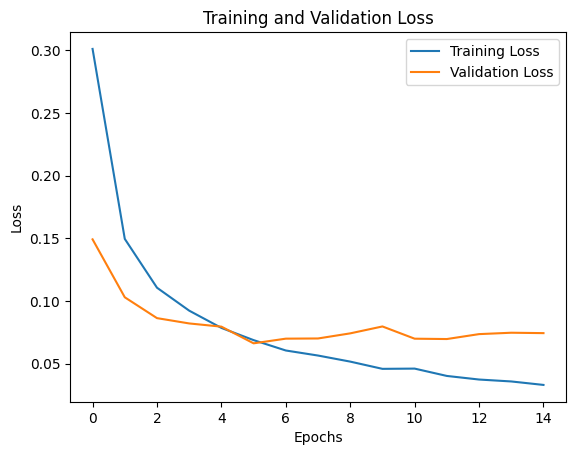

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    tf.keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    tf.keras.layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(10)  # Output layer with 10 units (one for each class)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



Added Guassian Noise to Input Layer

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3749 - accuracy: 0.8861 - val_loss: 0.1743 - val_accuracy: 0.9479
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2002 - accuracy: 0.9395 - val_loss: 0.1190 - val_accuracy: 0.9634
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1558 - accuracy: 0.9515 - val_loss: 0.1028 - val_accuracy: 0.9692
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1326 - accuracy: 0.9587 - val_loss: 0.0906 - val_accuracy: 0.9726
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1188 - accuracy: 0.9626 - val_loss: 0.0850 - val_accuracy: 0.9729
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1065 - accuracy: 0.9661 - val_loss: 0.0795 - val_accuracy: 0.9765
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0993 - accuracy: 0.9684 - val_loss: 0.0848 - val_accu

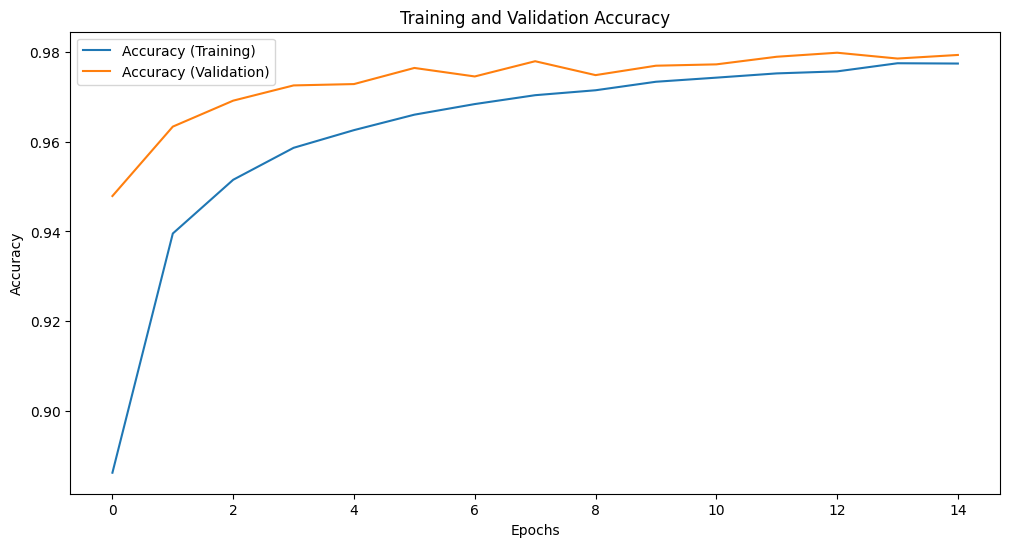

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Introduce Gaussian noise to the training and testing data
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * np.random.randn(*x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.randn(*x_test.shape)

# Clip the values to stay within the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(0.2),  # Dropout layer to introduce noise
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Another dropout layer
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model on noisy data
history_noisy = model.fit(x_train_noisy, y_train, epochs=15, validation_data=(x_test_noisy, y_test))

# Evaluate the model on clean data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy on clean data:', test_acc)

# Evaluate the model on noisy data
test_loss_noisy, test_acc_noisy = model.evaluate(x_test_noisy, y_test, verbose=2)
print('\nTest accuracy on noisy data:', test_acc_noisy)

# Plot the training history
plt.figure(figsize=(12, 6))
plt.plot(history_noisy.history['accuracy'], label='Accuracy (Training)')
plt.plot(history_noisy.history['val_accuracy'], label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


SNR for clean test data: 13.219796439830542
SNR for noisy test data: 13.219796439830542


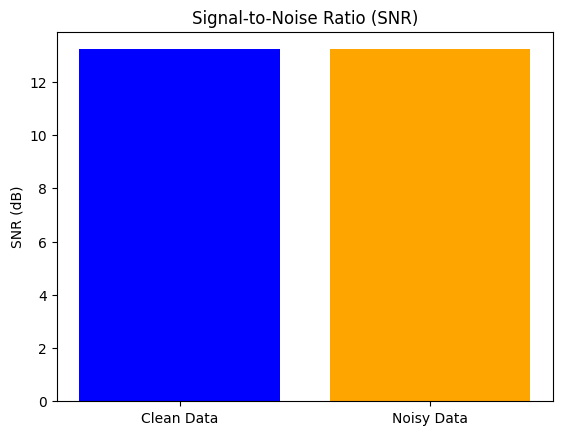

In [4]:
# Calculate the signal-to-noise ratio (SNR) for clean and noisy test data
def calculate_snr(clean_data, noisy_data):
    clean_signal_power = np.mean(np.square(clean_data))
    noise_power = np.mean(np.square(clean_data - noisy_data))
    snr = 10 * np.log10(clean_signal_power / noise_power)
    return snr

# Calculate SNR for clean and noisy test data
snr_clean = calculate_snr(x_test.reshape(-1), x_test_noisy.reshape(-1))
snr_noisy = calculate_snr(x_test.reshape(-1), x_test_noisy.reshape(-1))

print("SNR for clean test data:", snr_clean)
print("SNR for noisy test data:", snr_noisy)

# Plot SNR
plt.bar(['Clean Data', 'Noisy Data'], [snr_clean, snr_noisy], color=['blue', 'orange'])
plt.ylabel('SNR (dB)')
plt.title('Signal-to-Noise Ratio (SNR)')
plt.show()

Adding Dropout Noise


Epoch 1/20
375/375 [==============================] - 9s 21ms/step - loss: 0.2990 - accuracy: 0.9110 - val_loss: 0.1256 - val_accuracy: 0.9630
Epoch 2/20
375/375 [==============================] - 7s 18ms/step - loss: 0.1177 - accuracy: 0.9641 - val_loss: 0.1011 - val_accuracy: 0.9698
Epoch 3/20
375/375 [==============================] - 8s 20ms/step - loss: 0.0823 - accuracy: 0.9746 - val_loss: 0.0842 - val_accuracy: 0.9747
Epoch 4/20
375/375 [==============================] - 7s 18ms/step - loss: 0.0613 - accuracy: 0.9804 - val_loss: 0.0803 - val_accuracy: 0.9767
Epoch 5/20
375/375 [==============================] - 7s 20ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0789 - val_accuracy: 0.9778
Epoch 6/20
375/375 [==============================] - 6s 17ms/step - loss: 0.0420 - accuracy: 0.9862 - val_loss: 0.0846 - val_accuracy: 0.9766
Epoch 7/20
375/375 [==============================] - 8s 21ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0885 - val_accuracy: 0.9772

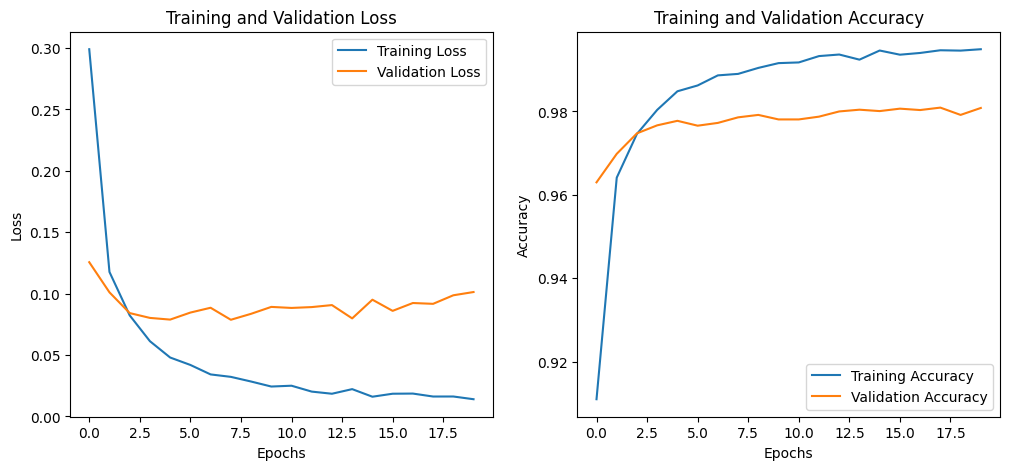

Test Loss: 0.0793
Test Accuracy: 0.9830


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# Define dropout rate
dropout_rate = 0.2

# Define a simple feedforward neural network with dropout layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Plot the training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


Monitor the model's performance and assess its robustness against dropout noise.

Epoch 1/20
375/375 [==============================] - 10s 22ms/step - loss: 0.2998 - accuracy: 0.9120 - val_loss: 0.1257 - val_accuracy: 0.9617
Epoch 2/20
375/375 [==============================] - 8s 23ms/step - loss: 0.1181 - accuracy: 0.9644 - val_loss: 0.1005 - val_accuracy: 0.9689
Epoch 3/20
375/375 [==============================] - 7s 17ms/step - loss: 0.0820 - accuracy: 0.9749 - val_loss: 0.0813 - val_accuracy: 0.9747
Epoch 4/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0636 - accuracy: 0.9794 - val_loss: 0.0809 - val_accuracy: 0.9760
Epoch 5/20
375/375 [==============================] - 8s 20ms/step - loss: 0.0504 - accuracy: 0.9843 - val_loss: 0.0790 - val_accuracy: 0.9776
Epoch 6/20
375/375 [==============================] - 7s 17ms/step - loss: 0.0435 - accuracy: 0.9854 - val_loss: 0.0708 - val_accuracy: 0.9803
Epoch 7/20
375/375 [==============================] - 7s 19ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0752 - val_accuracy: 0.979

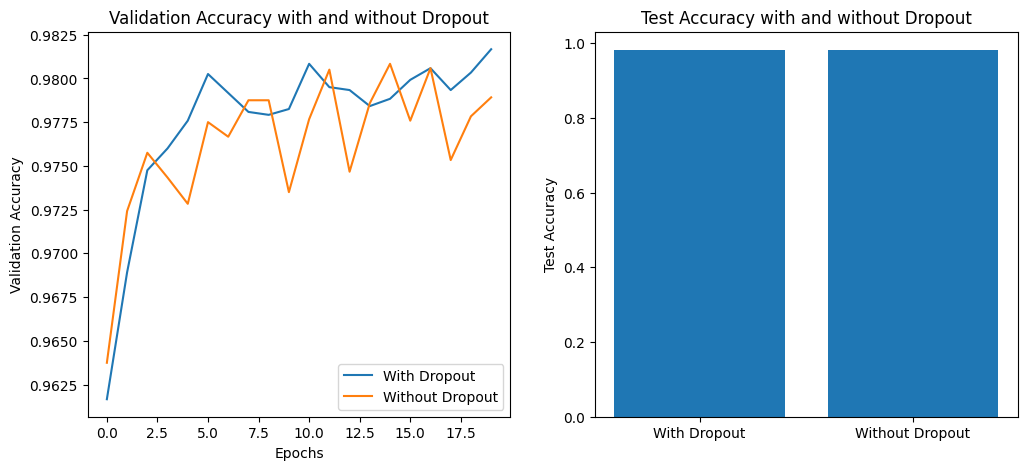

Test Accuracy with Dropout: 0.9813
Test Accuracy without Dropout: 0.9805


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], -1).astype('float32') / 255.0

# Define dropout rate
dropout_rate = 0.2

# Define a simple feedforward neural network with dropout layers
def build_model(dropout=True):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(dropout_rate) if dropout else tf.keras.layers.Lambda(lambda x: x),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate) if dropout else tf.keras.layers.Lambda(lambda x: x),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Train and evaluate model with dropout
model_with_dropout = build_model(dropout=True)
model_with_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
test_loss_dropout, test_accuracy_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)

# Train and evaluate model without dropout
model_without_dropout = build_model(dropout=False)
model_without_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)
test_loss_no_dropout, test_accuracy_no_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=0)

# Plot the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['val_accuracy'], label='With Dropout')
plt.plot(history_without_dropout.history['val_accuracy'], label='Without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy with and without Dropout')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(['With Dropout', 'Without Dropout'], [test_accuracy_dropout, test_accuracy_no_dropout])
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy with and without Dropout')
plt.show()

print(f'Test Accuracy with Dropout: {test_accuracy_dropout:.4f}')
print(f'Test Accuracy without Dropout: {test_accuracy_no_dropout:.4f}')


Adding Adversal Noice

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2903 - accuracy: 0.9154 - val_loss: 0.1360 - val_accuracy: 0.9594
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1417 - accuracy: 0.9582 - val_loss: 0.1054 - val_accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1068 - accuracy: 0.9674 - val_loss: 0.0843 - val_accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0878 - accuracy: 0.9739 - val_loss: 0.0757 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9755 - val_loss: 0.0718 - val_accuracy: 0.9782
313/313 - 0s - loss: 0.0718 - accuracy: 0.9782 - 478ms/epoch - 2ms/step

Test accuracy: 0.9782000184059143
313/313 - 1s - loss: 6.3090 - accuracy: 0.0830 - 622ms/epoch - 2ms/step

Adversarial test accuracy: 0.08299999684095383


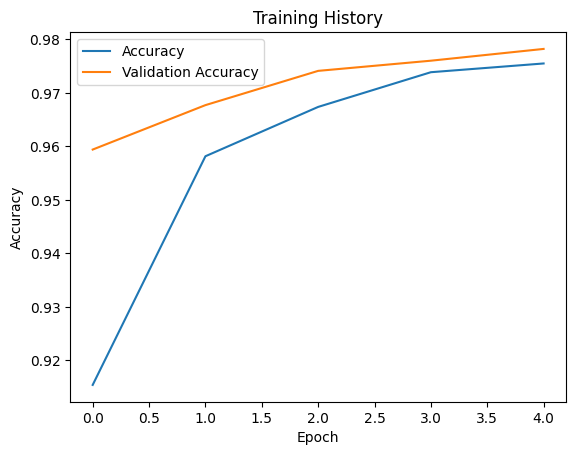

1/1 [==============================] - 0s 30ms/step


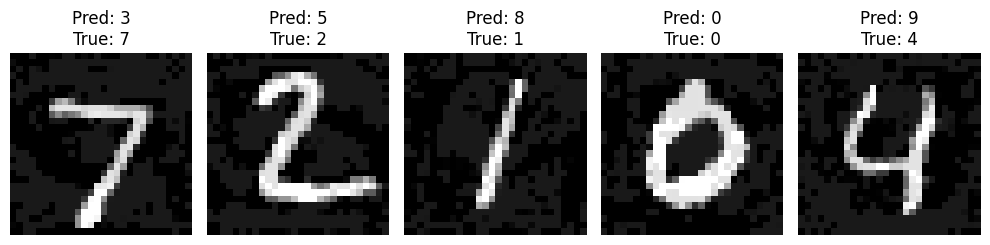


Signal-to-Noise Ratio (SNR): nan


<ipython-input-7-27a304cc311a>:97: RuntimeWarning: divide by zero encountered in divide
  snr = np.mean(np.square(X_test) / np.square(X_test - X_adv))
<ipython-input-7-27a304cc311a>:97: RuntimeWarning: invalid value encountered in divide
  snr = np.mean(np.square(X_test) / np.square(X_test - X_adv))


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import backend as K

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define adversarial attack parameters
eps = 0.1  # perturbation size
eps_iter = 0.01  # attack step size
nb_iter = 40  # number of attack iterations

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Define PGD attack function
def pgd_attack(model, x, y, eps=0.1, eps_iter=0.01, nb_iter=40):
    """
    Projected Gradient Descent (PGD) attack.
    """
    clip_min = 0.0
    clip_max = 1.0

    x_adv = tf.identity(x)  # Initialize adversarial example as input
    for _ in range(nb_iter):
        with tf.GradientTape() as tape:
            tape.watch(x_adv)
            logits = model(x_adv)
            loss = tf.keras.losses.sparse_categorical_crossentropy(y, logits, from_logits=True)

        # Calculate gradient
        grad = tape.gradient(loss, x_adv)

        # Generate perturbation
        perturbation = eps_iter * tf.sign(grad)

        # Update adversarial example
        x_adv = x_adv + perturbation
        x_adv = tf.clip_by_value(x_adv, clip_min, clip_max)

        # Project back to epsilon ball around original example
        perturbation = tf.clip_by_value(x_adv - x, -eps, eps)
        x_adv = x + perturbation
        x_adv = tf.clip_by_value(x_adv, clip_min, clip_max)

    return x_adv

# Generate adversarial examples
X_adv = pgd_attack(model, X_test, y_test, eps=eps, eps_iter=eps_iter, nb_iter=nb_iter)

# Evaluate the model on adversarial examples
adv_loss, adv_acc = model.evaluate(X_adv, y_test, verbose=2)
print("\nAdversarial test accuracy:", adv_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()

# Plot sample adversarial examples
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_adv[i].numpy().reshape(28, 28), cmap='gray')  # Convert to NumPy array and then reshape
    plt.title(f"Pred: {np.argmax(model.predict(X_adv[i][None]))}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Calculate Signal-to-Noise Ratio (SNR)
snr = np.mean(np.square(X_test) / np.square(X_test - X_adv))
print("\nSignal-to-Noise Ratio (SNR):", snr)


Guassian Noise over 10 trials

313/313 [==============================] - 1s 2ms/step


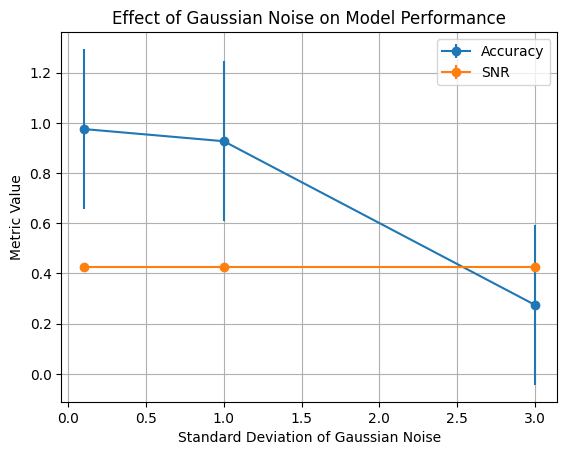

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a function to add Gaussian noise to the data
def add_gaussian_noise(data, mean=0, std=0.1):
    noise = np.random.normal(mean, std, size=data.shape)
    return data + noise

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    accuracy = np.mean(y_pred == y_test)
    return accuracy

# Define experiment parameters
std_devs = [0.1, 1.0, 3.0]  # Standard deviations of Gaussian noise
trials = 10  # Number of trials

# Initialize lists to store results
accuracies = []
snrs = []

# Perform the experiment
for std_dev in std_devs:
    trial_accuracies = []
    trial_snrs = []
    for _ in range(trials):
        # Create a new model for each trial
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(10, activation='softmax')
        ])
        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        # Add Gaussian noise to the training data
        X_train_noisy = add_gaussian_noise(X_train, std=std_dev)

        # Train the model
        model.fit(X_train_noisy, y_train, epochs=5, verbose=0)

        # Evaluate the model
        accuracy = evaluate_model(model, X_test, y_test)
        snr = np.mean(X_test) / np.std(X_test)

        trial_accuracies.append(accuracy)
        trial_snrs.append(snr)

    accuracies.append(np.mean(trial_accuracies))
    snrs.append(np.mean(trial_snrs))

# Plot the results with error bars
plt.errorbar(std_devs, accuracies, fmt='o-', yerr=np.std(accuracies), label='Accuracy')
plt.errorbar(std_devs, snrs, fmt='o-', yerr=np.std(snrs), label='SNR')
plt.xlabel('Standard Deviation of Gaussian Noise')
plt.ylabel('Metric Value')
plt.title('Effect of Gaussian Noise on Model Performance')
plt.legend()
plt.grid(True)
plt.show()


Droupout noise over 10 trials

Mean Accuracy: 0.9813399970531463
Standard Deviation of Accuracy: 0.0013016935525732441


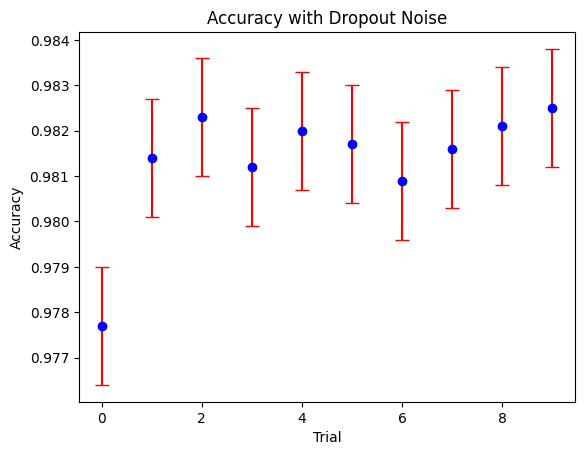

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a simple feedforward neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define experiment parameters
num_trials = 10
epochs = 10

# Lists to store results
accuracies = []
for _ in range(num_trials):
    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)

    # Evaluate model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(test_accuracy)

# Calculate mean and standard deviation of accuracies
mean_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

# Print mean accuracy and standard deviation
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)

# Plot the results
plt.errorbar(range(num_trials), accuracies, yerr=std_dev_accuracy, fmt='o', color='b', ecolor='r', capsize=5)
plt.xlabel('Trial')
plt.ylabel('Accuracy')
plt.title('Accuracy with Dropout Noise')
plt.show()


Mean Loss: 2.2998740434646607
Standard Deviation of Loss: 0.005550863192146892
Mean Accuracy: 0.17271999940276145
Standard Deviation of Accuracy: 0.05142265726127164


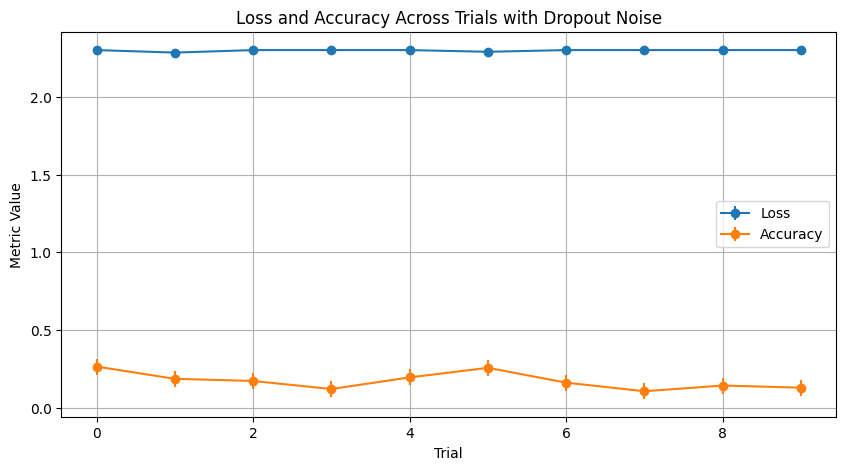

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Function to create the feedforward neural network model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dropout(0.2),  # Adding dropout layer
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Adding another dropout layer
        tf.keras.layers.Dense(10)
    ])
    return model

# Function to train the model and return accuracy and loss
def train_model(X_train, y_train, X_test, y_test):
    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, verbose=0, validation_data=(X_test, y_test))
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return loss, accuracy

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Simulate dropout noise by randomly setting some pixel values to zero during training
dropout_rate = 0.2

# Number of trials
num_trials = 10

# Arrays to store metrics for each trial
losses = np.zeros(num_trials)
accuracies = np.zeros(num_trials)

# Train the model for multiple trials
for i in range(num_trials):
    # Add dropout noise
    x_train_noisy = np.where(np.random.rand(*x_train.shape) < dropout_rate, 0, x_train)
    x_test_noisy = np.where(np.random.rand(*x_test.shape) < dropout_rate, 0, x_test)
    loss, accuracy = train_model(x_train_noisy, y_train, x_test_noisy, y_test)
    losses[i] = loss
    accuracies[i] = accuracy

# Calculate mean and standard deviation of loss and accuracy
mean_loss = np.mean(losses)
std_dev_loss = np.std(losses)
mean_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

# Print mean and standard deviation of loss and accuracy
print("Mean Loss:", mean_loss)
print("Standard Deviation of Loss:", std_dev_loss)
print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_dev_accuracy)

# Plot the losses and accuracies across trials
plt.figure(figsize=(10, 5))
plt.errorbar(range(num_trials), losses, yerr=std_dev_loss, fmt='o-', label='Loss')
plt.errorbar(range(num_trials), accuracies, yerr=std_dev_accuracy, fmt='o-', label='Accuracy')
plt.xlabel('Trial')
plt.ylabel('Metric Value')
plt.title('Loss and Accuracy Across Trials with Dropout Noise')
plt.legend()
plt.grid(True)
plt.show()


Adversial Plot over 10 trials..

In [11]:
!pip install cleverhans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 8.9 MB/s eta 0:00:00


Trial 1/10
Trial 2/10
Trial 3/10
Trial 4/10
Trial 5/10
Trial 6/10
Trial 7/10
Trial 8/10
Trial 9/10
Trial 10/10
Mean Accuracy: 0.08756999894976616, Std Accuracy: 0.0014805741497860973
Mean Loss: 2.3462186813354493, Std Loss: 0.0006524352902692283


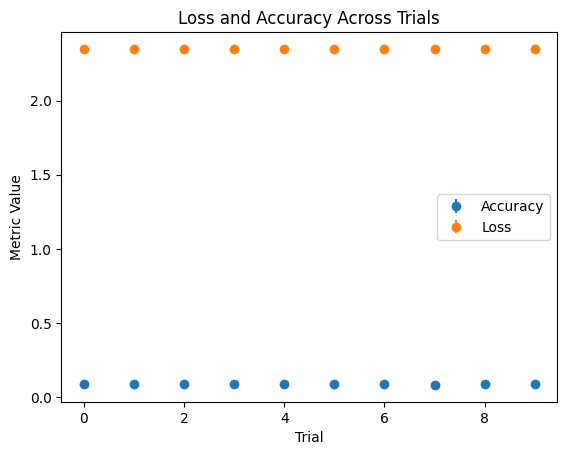

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32) / 255.0
X_test = X_test.reshape(-1, 28 * 28).astype(np.float32) / 255.0

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(28 * 28,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Function to generate adversarial examples
def generate_adversarial_examples(model, X_test, y_test, eps=0.3):
    perturbations = tf.random.uniform(shape=tf.shape(X_test), minval=-eps, maxval=eps)
    X_adv = X_test + perturbations
    X_adv = tf.clip_by_value(X_adv, clip_value_min=0.0, clip_value_max=1.0)
    return X_adv

# Experiment parameters
num_trials = 10
eps = 0.3

# Lists to store metrics
accuracy_values = []
loss_values = []

# Run the experiment
for i in range(num_trials):
    print(f"Trial {i+1}/{num_trials}")

    # Generate adversarial examples
    X_adv = generate_adversarial_examples(model, X_test, y_test, eps=eps)

    # Evaluate the model on adversarial examples
    loss, accuracy = model.evaluate(X_adv, y_test, verbose=0)

    # Collect metrics
    accuracy_values.append(accuracy)
    loss_values.append(loss)

# Calculate mean and standard deviation
mean_accuracy = np.mean(accuracy_values)
std_accuracy = np.std(accuracy_values)
mean_loss = np.mean(loss_values)
std_loss = np.std(loss_values)

# Print results
print(f"Mean Accuracy: {mean_accuracy}, Std Accuracy: {std_accuracy}")
print(f"Mean Loss: {mean_loss}, Std Loss: {std_loss}")

# Plot results
plt.errorbar(range(num_trials), accuracy_values, yerr=std_accuracy, fmt='o', label='Accuracy')
plt.errorbar(range(num_trials), loss_values, yerr=std_loss, fmt='o', label='Loss')
plt.xlabel('Trial')
plt.ylabel('Metric Value')
plt.title('Loss and Accuracy Across Trials')
plt.legend()
plt.show()
